In [11]:
import sys
sys.path.append('..')

import canopus
from qiskit import QuantumCircuit
from monodromy.render import _plot_coverage_set
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sqrt
from weylchamber.visualize import WeylChamber
import weylchamber
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.stats import unitary_group
import warnings

warnings.filterwarnings('ignore')

### Weyl chamber

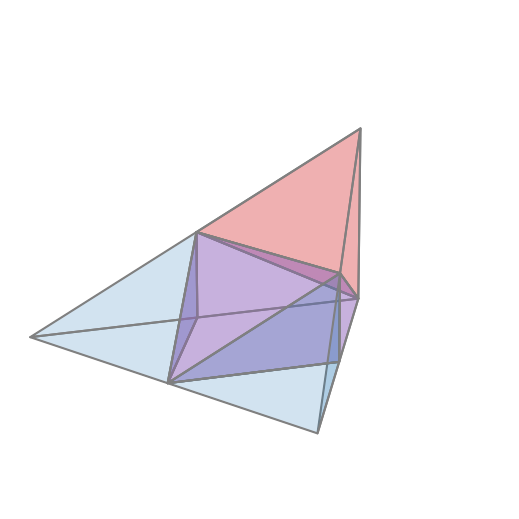

In [12]:
fig = plt.figure(figsize=(6, 5))


w = WeylChamber()

# define some vertices to visualize different AshN subscheme fields
cnot_vis_coord = [0.5, 0, 0]
iswap_vis_coord = [0.5, 0.5, 0]
sqisw_vis_coord = [0.25, 0.25, 0]
sqisw_vis_coord_right = [0.75, 0.25, 0]
sqswap_vis_coord = [0.25, 0.25, 0.25]
sqswap_vis_coord_right = [0.75, 0.25, 0.25]
id_vis_coord = [0, 0, 0]
id_vis_coord_right = [1, 0, 0]
swap_vis_coord = [0.5, 0.5, 0.5]


w.plot(fig)
# w.ax.set_box_aspect([1, 0.8, 0.6])
w.ax.set_box_aspect([1, 0.8, 0.5])


w.ax.add_collection3d(Poly3DCollection(
    [[id_vis_coord, cnot_vis_coord, sqisw_vis_coord], 
     [id_vis_coord, sqisw_vis_coord, sqswap_vis_coord],
     [cnot_vis_coord, sqisw_vis_coord, sqswap_vis_coord],],
     facecolors='C0', edgecolors='grey', linewidths=1.5, alpha=.2, zorder=3))

w.ax.add_collection3d(Poly3DCollection(
    [[id_vis_coord_right, cnot_vis_coord, sqisw_vis_coord_right], 
     [id_vis_coord_right, sqisw_vis_coord_right, sqswap_vis_coord_right],
     [cnot_vis_coord, sqisw_vis_coord_right, sqswap_vis_coord_right],],
     facecolors='C0', edgecolors='grey', linewidths=1.5, alpha=.2, zorder=3))

w.ax.add_collection3d(Poly3DCollection(
    [[swap_vis_coord, iswap_vis_coord, sqswap_vis_coord],
     [swap_vis_coord, iswap_vis_coord, sqswap_vis_coord_right],
     [swap_vis_coord, sqswap_vis_coord, sqswap_vis_coord_right],
     [iswap_vis_coord, sqswap_vis_coord, sqswap_vis_coord_right],],
     facecolors='C3', edgecolors='grey', linewidths=1.5, alpha=.2, zorder=3))

w.ax.add_collection3d(Poly3DCollection(
    [[cnot_vis_coord, sqisw_vis_coord, sqswap_vis_coord],
     [cnot_vis_coord, sqisw_vis_coord_right, sqswap_vis_coord_right],
     [cnot_vis_coord, sqswap_vis_coord, sqswap_vis_coord_right],
     [iswap_vis_coord, sqswap_vis_coord, sqswap_vis_coord_right],
     [iswap_vis_coord, sqisw_vis_coord, sqswap_vis_coord],
     [iswap_vis_coord, sqisw_vis_coord_right, sqswap_vis_coord_right],
     [cnot_vis_coord, sqisw_vis_coord, iswap_vis_coord, sqisw_vis_coord_right]],
     facecolors='C4', edgecolors='grey', linewidths=1.5, alpha=.3, zorder=3))

# turn off the axis
w.ax.set_axis_off()

plt.savefig('./weyl_chamber.svg', bbox_inches='tight')

plt.show()

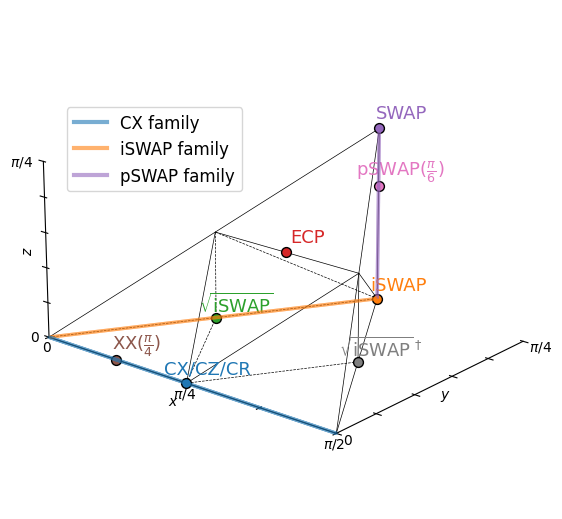

In [13]:
fig = plt.figure(figsize=(6, 5))

gate_coords = {
    'CX/CZ/CR': (0.5, 0.0, 0.0),
    'iSWAP': (0.5, 0.5, 0.0),
    '$\sqrt{\mathrm{iSWAP}}$': (0.25, 0.25, 0.0),
    'ECP': (0.5, 0.25, 0.25),
    'SWAP': (0.5, 0.5, 0.5),
    '$\mathrm{XX}(\\frac{\pi}{4})$': (0.25, 0.0, 0.0),
    '$\mathrm{pSWAP}(\\frac{\pi}{6})$': (0.5, 0.5, 1/3),
    '$\sqrt{\mathrm{iSWAP}}^\dagger$': (0.75, 0.25, 0.0),
}

w = WeylChamber()

scatter_index = 0
for i, (gname, (x, y, z)) in enumerate(gate_coords.items()):
    w.add_point(x, y, z, scatter_index, 
                c="C{}".format(i), s=50,
                edgecolors='k', zorder=2)
    scatter_index += 1



right_offset = 0.075
top_offset = 0.06

w.plot(fig)



for i, (gname, (x, y, z)) in enumerate(gate_coords.items()):
    w.ax.text(x + right_offset, y, z + top_offset, gname, fontsize=13, ha='center', va='center', color='C{}'.format(i))


from matplotlib.colors import to_rgba

# Add CX family
w.ax.add_collection3d(Poly3DCollection(
    [[id_vis_coord, id_vis_coord_right, cnot_vis_coord], 
     [id_vis_coord, id_vis_coord_right, cnot_vis_coord],
     [id_vis_coord, cnot_vis_coord, cnot_vis_coord],
     [id_vis_coord_right, cnot_vis_coord, cnot_vis_coord]],
     facecolors='C0', edgecolors=to_rgba('C0', alpha=0.3) , linewidths=2.5, alpha=.2, zorder=-2))


# Add iSWAP family
w.ax.add_collection3d(Poly3DCollection(
    [[id_vis_coord, iswap_vis_coord, iswap_vis_coord], 
     [id_vis_coord, iswap_vis_coord, iswap_vis_coord],
     [id_vis_coord, iswap_vis_coord, iswap_vis_coord],
     [iswap_vis_coord, iswap_vis_coord, iswap_vis_coord]],
     facecolors='C1', edgecolors=to_rgba('C1', 0.3), linewidths=2.5, alpha=.2, zorder=-2))


# Add pSWAP family
w.ax.add_collection3d(Poly3DCollection(
    [[swap_vis_coord, iswap_vis_coord, iswap_vis_coord], 
     [swap_vis_coord, iswap_vis_coord, iswap_vis_coord],
     [swap_vis_coord, iswap_vis_coord, iswap_vis_coord],
     [iswap_vis_coord, iswap_vis_coord, iswap_vis_coord]],
     facecolors='C4', edgecolors=to_rgba('C4', 0.3), linewidths=2.5, alpha=.2, zorder=-2))

# 添加图例
# cx_family_legend = Patch(facecolor='C0', edgecolor='grey', label='CX family', alpha=0.6)
# iswap_family_legend = Patch(facecolor='C1', edgecolor='grey', label='iSWAP family', alpha=0.6)
# pswap_family_legend = Patch(facecolor='C4', edgecolor='grey', label='pSWAP family', alpha=0.6)

cx_family_legend = Line2D([], [], color='C0', linewidth=3, label='CX family', alpha=0.6)
iswap_family_legend = Line2D([], [], color='C1', linewidth=3, label='iSWAP family', alpha=0.6)
pswap_family_legend = Line2D([], [], color='C4', linewidth=3, label='pSWAP family', alpha=0.6)



# 添加图例到图形中
plt.legend(handles=[cx_family_legend, iswap_family_legend, pswap_family_legend], loc='upper left', prop={'size': 12}, bbox_to_anchor=(0.06, 0.82))


# w.ax.set_box_aspect([1, 0.8, 0.6])
w.ax.set_box_aspect([1, 0.8, 0.5])


plt.savefig('./weyl_chamber.pdf', bbox_inches='tight')

plt.show()

### Mirroring

In [14]:
fig = plt.figure(figsize=(6,5))
# fig.set_box_aspect([1, 0.8, 0.6]) 

w = WeylChamber()
# w.facecolor = 'lightblue'
# w.panecolor = (0.8, 1.0, 0.8, 1.0)
# w.grid=True
w.plot(fig)

verts_i_cnot_iswap = [[0, 0, 0], [1, 0, 0], [0.5, 0.5, 0]]
verts_swap_cnot_iswap = [[0.5, 0.5, 0.5], [0.5, 0, 0], [0.5, 0.5, 0]]

w.ax.set_box_aspect([1, 0.8, 0.5]) 
w.ax.add_collection3d(Poly3DCollection([verts_i_cnot_iswap], 
                                       linewidths=0.5,
                                       facecolors='lightblue', 
                                       linestyles='dashed',
                                       edgecolors='None', alpha=.5))
w.ax.add_collection3d(Poly3DCollection([verts_swap_cnot_iswap], 
                                       linewidths=0.5,
                                       facecolors='lightgreen',
                                       edgecolors='None',
                                       linestyles='dashed',
                                       alpha=.5))
offset = 0.06
# w.ax.text(0+offset/3, 0+offset/4, 0+offset, 'I', color='C4', fontsize=10, ha='center', va='center', fontweight='bold')
# w.ax.text(1+offset/2, 0+offset/4, 0+offset, 'I', color='C4', fontsize=10, ha='center', va='center', fontweight='bold')
# w.ax.text(x + right_offset, y, z + top_offset, gname, fontsize=13, ha='center', va='center', color='C{}'.format(i))



w.ax.text(0.5 + offset, 0.5 + offset, 0, 'iSWAP', color='C1', fontsize=13, ha='center', va='center')
w.ax.text(0.5+offset/3, 0.5+offset/3, 0.5 + offset/2, 'SWAP', color='C4', fontsize=13, ha='center', va='center')
w.ax.text(0.5, 0+offset/4, 0+offset/2, 'CX/CZ/CR', color='C0', fontsize=13, ha='center', va='center', zorder=10)
plt.savefig('cphase_mirror.pdf', dpi=400)

global phase: π/2
       ┌────────────┐  ┌───────────────┐┌─────────────┐ 
q_0: ──┤ U(π/2,0,0) ├──┤1              ├┤ U(π/2,-π,π) ├─
     ┌─┴────────────┴─┐│  Can(0.5,0,0) │├─────────────┴┐
q_1: ┤ U(π/2,-5π/2,0) ├┤0              ├┤ U(π/2,π,π/2) ├
     └────────────────┘└───────────────┘└──────────────┘

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0,1)
# qc.h(0)
qc.h(1)
qc.cx(0,1)
canopus.rebase_to_canonical(qc).draw()

In [ ]:
_plot_coverage_set(canopus.utils.get_zzphase_coverage(), output_fname='./figures/coverage_zzphase.pdf');
_plot_coverage_set(canopus.utils.get_zzphase_with_mirror_coverage(), output_fname='./figures/coverage_zzphase_.pdf');
_plot_coverage_set(canopus.utils.get_sqisw_coverage(), output_fname='./figures/coverage_sqisw.pdf');
_plot_coverage_set(canopus.utils.get_cx_coverage(), output_fname='./figures/coverage_cx.pdf');
_plot_coverage_set(canopus.utils.get_sqisw_with_mirror_coverage(), output_fname='./figures/coverage_sqisw_.pdf');
_plot_coverage_set(canopus.utils.get_het_isa_coverage(), output_fname='./figures/coverage_het.pdf');

### DAG

In [ ]:
from regulus import Circuit, gates
import numpy as np
import pydot
from regulus.utils.graphs import rx_to_nx_graph
import rustworkx as rx
import networkx as nx
from typing import List, Tuple, Union
from IPython.display import Image

In [ ]:
def draw_circ_dag_graphviz(dag: Union[nx.DiGraph, rx.PyDiGraph], fname: str = None) -> Image:
    from regulus.basic.gates import Gate

    if isinstance(dag, rx.PyDiGraph):
        dag = rx_to_nx_graph(dag)

    dot = pydot.Dot(graph_type='digraph')
    gate_to_node = {}
    # colors = {1: 'white', 2: 'lightblue', 3: 'lightgreen', 4: 'lightpink', 5: 'lightyellow', 6: 'lightgray', 7: 'lightcyan', 8: 'lightcoral'}
    colors = {'U3': 'white', 'Can': 'lightblue', 'SWAP': 'lightpink'}

    for g in dag.nodes:
        node = pydot.Node(hash(g), label=str(g).split('(')[0].split('{')[0], # fillcolor=colors[g.num_qregs]
                          fillcolor=colors[g.name],
                          style='filled')
        gate_to_node[g] = node
        dot.add_node(node)
    for edge in dag.edges:
        dot.add_edge(pydot.Edge(gate_to_node[edge[0]], gate_to_node[edge[1]]))
    dot.set_rankdir('LR')
    if fname:
        dot.write_svg(fname)
        
    return Image(dot.create_png())

def random_abc():
    a = np.random.uniform(0, 0.5)
    b = np.random.uniform(0, a)
    c = np.random.uniform(-b, b)
    return a, b, c

In [ ]:
circ = Circuit([
    gates.U3(*np.random.rand(3)).on(0),
    # gates.U3(*np.random.rand(3)).on(1),
    gates.U3(*np.random.rand(3)).on(2),
    # gates.U3(*np.random.rand(3)).on(3),
    gates.Can(*random_abc()).on([1, 3]),
    gates.Can(*random_abc()).on([0, 1]),
    gates.U3(*np.random.rand(3)).on(0),
    gates.U3(*np.random.rand(3)).on(1),
    gates.Can(*random_abc()).on([2, 3]),
    gates.U3(*np.random.rand(3)).on(2),
    gates.Can(*random_abc()).on([1, 3]),
    gates.Can(*random_abc()).on([0, 2]),
    # gates.Can(*np.random.rand(3)).on([0, 1]),
    gates.U3(*np.random.rand(3)).on(1),
    # gates.U3(*np.random.rand(3)).on(2),
    gates.U3(*np.random.rand(3)).on(3),
])

qc = QuantumCircuit(4)
qc.u(*np.random.rand(3), 0)
qc.u(*np.random.rand(3), 2)
qc.append(canopus.CanonicalGate(*random_abc()), [1, 3])
qc.append(canopus.CanonicalGate(*random_abc()), [0, 1])
qc.u(*np.random.rand(3), 0)
qc.u(*np.random.rand(3), 1)
qc.append(canopus.CanonicalGate(*random_abc()), [2, 3])
qc.u(*np.random.rand(3), 2)
qc.append(canopus.CanonicalGate(*random_abc()), [1, 3])
qc.append(canopus.CanonicalGate(*random_abc()), [0, 2])
qc.u(*np.random.rand(3), 1)
# qc.u(*np.random.rand(3), 2)
qc.u(*np.random.rand(3), 3)
qc.draw(fold=1000)

In [ ]:
draw_circ_dag_graphviz(circ.to_dag(), 'logical_circuit.svg')

In [ ]:
circ.to_qiskit().draw(fold=1000)

In [ ]:
from qiskit.transpiler import PassManager
def canopus_pass(qc, topology, isa):
    if topology == "chain":
        coupling_map = canopus.utils.gene_chain_coupling_map(qc.num_qubits)
    elif topology == "hhex":
        coupling_map = canopus.utils.gene_hhex_coupling_map(qc.num_qubits)
    elif topology == "square":
        coupling_map = canopus.utils.gene_square_coupling_map(qc.num_qubits)
    else:
        raise ValueError(f"Unsupported topology: {topology}")
    
    backend = canopus.CanopusBackend(coupling_map, isa)
    qc_mapped = PassManager(canopus.CanopusMapping(backend)).run(qc)
    return qc_mapped


In [ ]:
canopus_pass(qc, 'chain', 'sqisw_').draw(fold=1000)

In [ ]:
draw_circ_dag_graphviz(Circuit.from_qiskit(canopus_pass(qc, 'chain', 'sqisw_')).to_dag(), 'mapped_circuit.svg')

In [ ]:
circ = Circuit([
    gates.U3(*np.random.rand(3)).on(0),
    gates.U3(*np.random.rand(3)).on(2),
    gates.Can(*random_abc()).on([1, 3]),
    gates.Can(*random_abc()).on([0, 1]),
    gates.U3(*np.random.rand(3)).on(0),
    gates.U3(*np.random.rand(3)).on(1),
    gates.Can(*random_abc()).on([2, 3]),
    gates.SWAP.on([2, 3]),
    gates.U3(*np.random.rand(3)).on(2),
    gates.Can(*random_abc()).on([1, 3]),
    gates.SWAP.on([0, 1]),
    # gates.SWAP.on([2, 3]),
    gates.Can(*random_abc()).on([0, 2]),
    gates.U3(*np.random.rand(3)).on(1),
    gates.U3(*np.random.rand(3)).on(3),
])


draw_circ_dag_graphviz(circ.to_dag(), 'mapped_circuit.svg')